In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plp


df = pd.read_csv(r"C:\Users\admin\Desktop\telecom_churn.csv")
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [3]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

customer_id              int64
telecom_partner         object
gender                  object
age                      int64
state                   object
city                    object
pincode                  int64
date_of_registration    object
num_dependents           int64
estimated_salary         int64
calls_made               int64
sms_sent                 int64
data_used                int64
churn                    int64
dtype: object

In [6]:
# Feature engineering to change the date of registration with datetime format

from datetime import datetime
import seaborn as sns


# Convert 'date_of_registration' to datetime
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])

# Calculate customer tenure in days
today_date = datetime.today()
df['tenure_days'] = (today_date - df['date_of_registration']).dt.days

# Optional: create tenure group labels
bins = [0, 90, 365, df['tenure_days'].max()]
labels = ['New (<3mo)', 'Regular (<1yr)', 'Loyal (>1yr)']
df['tenure_group'] = pd.cut(df['tenure_days'], bins=bins, labels=labels)

# Sanity check
df[['date_of_registration', 'tenure_days', 'tenure_group']].head()


,date_of_registration,tenure_days,tenure_group
0,2020-01-01,1935,Loyal (>1yr)
1,2020-01-01,1935,Loyal (>1yr)
2,2020-01-01,1935,Loyal (>1yr)
3,2020-01-01,1935,Loyal (>1yr)
4,2020-01-01,1935,Loyal (>1yr)


In [7]:
# Tenure in months (approximate)
df['tenure_months'] = df['tenure_days'] // 30

# Optional: Sanity check
df[['date_of_registration', 'tenure_days', 'tenure_months']].head()


,date_of_registration,tenure_days,tenure_months
0,2020-01-01,1935,64
1,2020-01-01,1935,64
2,2020-01-01,1935,64
3,2020-01-01,1935,64
4,2020-01-01,1935,64


In [8]:
drop_cols = ['date_of_registration', 'tenure_days']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_group,tenure_months
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,4,124962,44,45,-361,0,Loyal (>1yr),64
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2,130556,62,39,5973,0,Loyal (>1yr),64
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,0,148828,49,24,193,1,Loyal (>1yr),64
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,1,38722,80,25,9377,1,Loyal (>1yr),64
4,5,BSNL,F,26,Tripura,Delhi,740247,2,55098,78,15,1393,0,Loyal (>1yr),64


In [9]:
df.dtypes

customer_id            int64
telecom_partner       object
gender                object
age                    int64
state                 object
city                  object
pincode                int64
num_dependents         int64
estimated_salary       int64
calls_made             int64
sms_sent               int64
data_used              int64
churn                  int64
tenure_group        category
tenure_months          int64
dtype: object

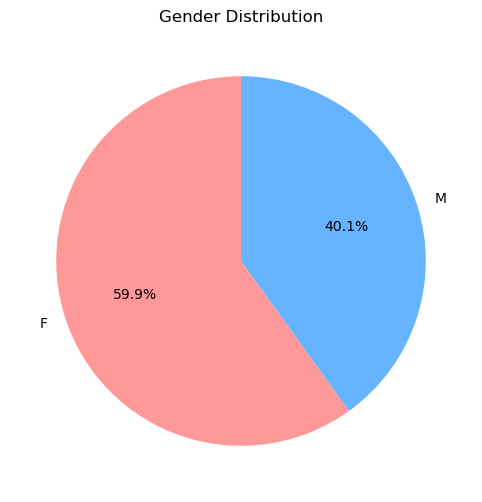

In [10]:
# pie chart for gender distribution
plp.figure(figsize=(10, 6))
plp.pie(df['gender'].value_counts(), labels=df['gender'].unique(), autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plp.title('Gender Distribution')
plp.show()

In [11]:
# Encode gender: M = 1, F = 0
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Sanity check
df['gender'].value_counts(normalize=True)


gender
1    0.599364
0    0.400636
Name: proportion, dtype: float64

In [12]:
df.dtypes

customer_id            int64
telecom_partner       object
gender                 int64
age                    int64
state                 object
city                  object
pincode                int64
num_dependents         int64
estimated_salary       int64
calls_made             int64
sms_sent               int64
data_used              int64
churn                  int64
tenure_group        category
tenure_months          int64
dtype: object

In [13]:
# Drop customer_id for modeling
df.drop(columns=['customer_id'], inplace=True)


In [14]:
df.head()

,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_group,tenure_months
0,Reliance Jio,0,25,Karnataka,Kolkata,755597,4,124962,44,45,-361,0,Loyal (>1yr),64
1,Reliance Jio,0,55,Mizoram,Mumbai,125926,2,130556,62,39,5973,0,Loyal (>1yr),64
2,Vodafone,0,57,Arunachal Pradesh,Delhi,423976,0,148828,49,24,193,1,Loyal (>1yr),64
3,BSNL,1,46,Tamil Nadu,Kolkata,522841,1,38722,80,25,9377,1,Loyal (>1yr),64
4,BSNL,0,26,Tripura,Delhi,740247,2,55098,78,15,1393,0,Loyal (>1yr),64


In [15]:
df.describe()

,gender,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_months
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,0.599364,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478,43.718620
std,0.490028,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359,11.733598
min,0.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000,23.000000
25%,0.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000,34.000000
50%,1.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000,44.000000
75%,1.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000,54.000000
max,1.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000,64.000000


In [16]:
## to convert negative values to positive we will create a new feature to categorize the clients with their estimated salary, then convert to the median of each category

bins = [20000, 50000, 100000, 150000]  
labels = ['Low', 'Medium', 'High']  
df['salary_group'] = pd.cut(df['estimated_salary'], bins=bins, labels=labels)  


In [17]:
# Columns to fix
usage_cols = ['calls_made', 'sms_sent', 'data_used']

for col in usage_cols:
    # Calculate median per group (only for non-negative values)
    group_medians = df[df[col] >= 0].groupby('salary_group')[col].median()
    
    # Replace negatives with their group's median
    df[col] = df.apply(
        lambda row: group_medians[row['salary_group']] if row[col] < 0 else row[col],
        axis=1
    )

C:\Users\admin\AppData\Local\Temp\ipykernel_17540\326586685.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = df[df[col] >= 0].groupby('salary_group')[col].median()
C:\Users\admin\AppData\Local\Temp\ipykernel_17540\326586685.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = df[df[col] >= 0].groupby('salary_group')[col].median()
C:\Users\admin\AppData\Local\Temp\ipykernel_17540\326586685.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

In [18]:
df.describe()

,gender,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_months
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,0.599364,46.077609,549501.270541,1.997500,85021.137839,50.508821,24.772776,5128.303922,0.200478,43.718620
std,0.490028,16.444029,259808.860574,1.414941,37508.963233,28.067379,13.981597,2816.491045,0.400359,11.733598
min,0.000000,18.000000,100006.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,0.000000,32.000000,324586.000000,1.000000,52585.000000,27.000000,13.000000,2737.000000,0.000000,34.000000
50%,1.000000,46.000000,548112.000000,2.000000,84990.000000,50.000000,25.000000,5107.000000,0.000000,44.000000
75%,1.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000,54.000000
max,1.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000,64.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   telecom_partner   243553 non-null  object  
 1   gender            243553 non-null  int64   
 2   age               243553 non-null  int64   
 3   state             243553 non-null  object  
 4   city              243553 non-null  object  
 5   pincode           243553 non-null  int64   
 6   num_dependents    243553 non-null  int64   
 7   estimated_salary  243553 non-null  int64   
 8   calls_made        243553 non-null  float64 
 9   sms_sent          243553 non-null  float64 
 10  data_used         243553 non-null  float64 
 11  churn             243553 non-null  int64   
 12  tenure_group      243553 non-null  category
 13  tenure_months     243553 non-null  int64   
 14  salary_group      243552 non-null  category
dtypes: category(2), float64(3), int64(7), object(3)
mem

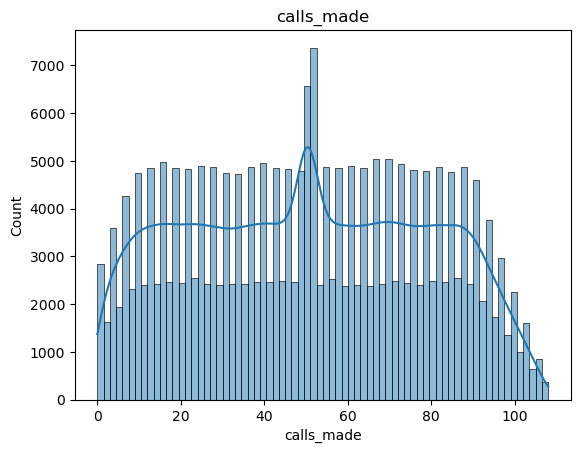

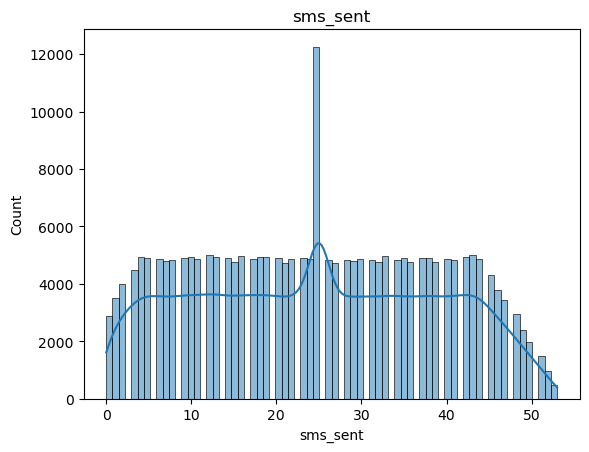

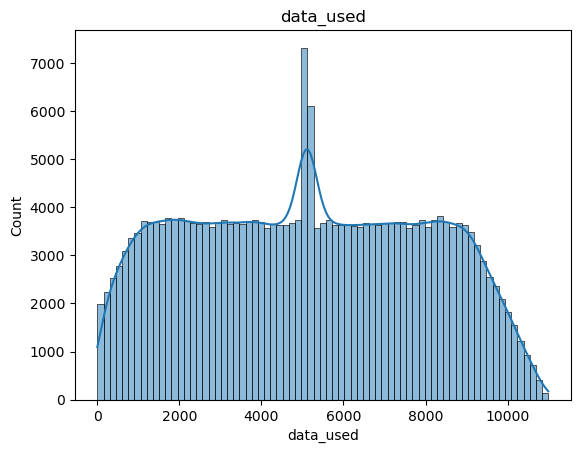

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['calls_made', 'sms_sent', 'data_used']:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


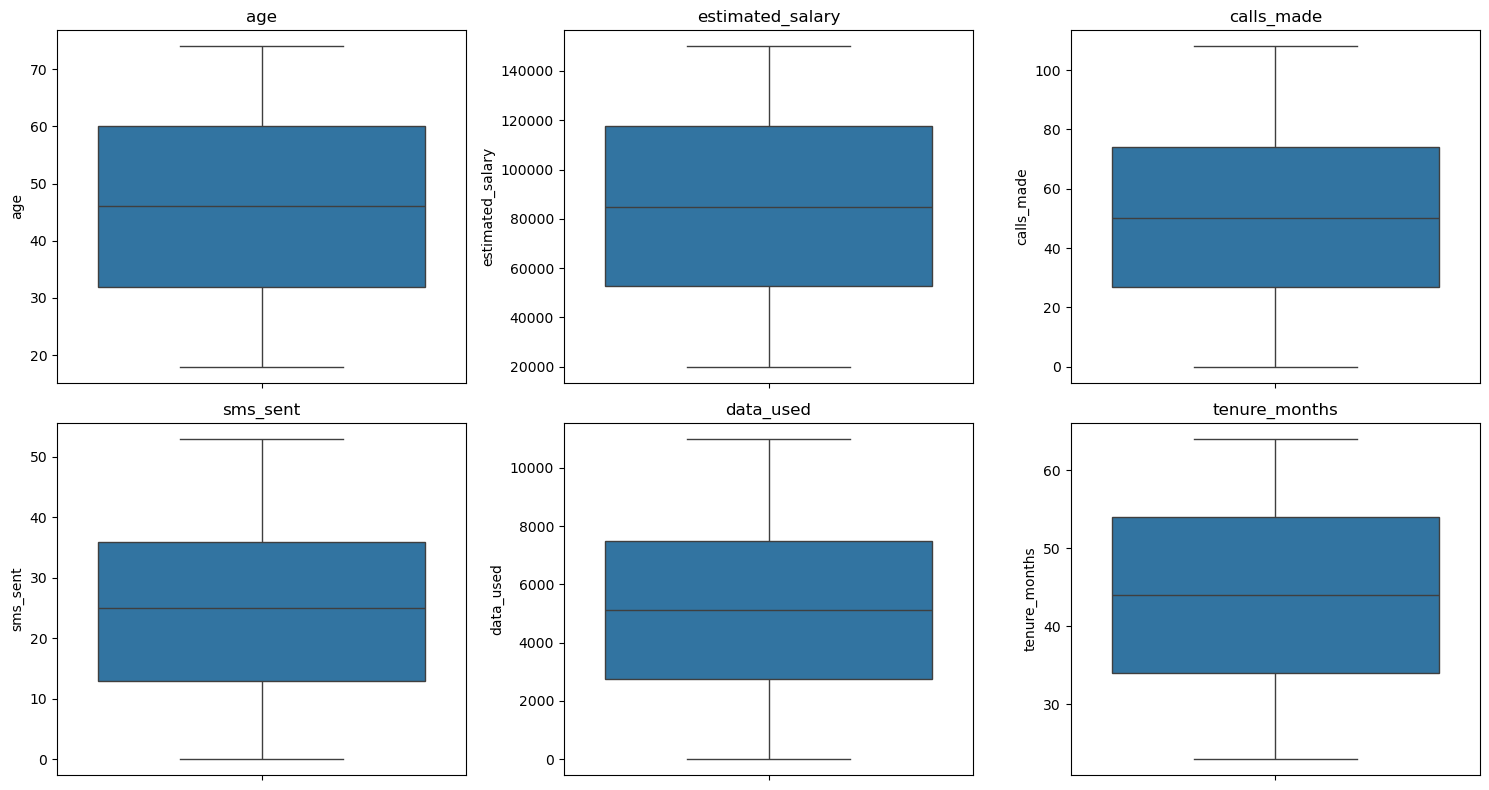

In [21]:
#handling outliers
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features to check for outliers
num_features = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'tenure_months']

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [22]:
# Doublecheck to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply to all numerical columns
for col in num_features:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)} rows")


Outliers in age: 0 rows
Outliers in estimated_salary: 0 rows
Outliers in calls_made: 0 rows
Outliers in sms_sent: 0 rows
Outliers in data_used: 0 rows
Outliers in tenure_months: 0 rows


In [23]:
# Drop unnecessary columns if they exist
columns_to_drop = ['customer_id', 'date_of_registration']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [24]:
# One-hot encode telecom_partner
df = pd.get_dummies(df, columns=['telecom_partner'], drop_first=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   gender                        243553 non-null  int64   
 1   age                           243553 non-null  int64   
 2   state                         243553 non-null  object  
 3   city                          243553 non-null  object  
 4   pincode                       243553 non-null  int64   
 5   num_dependents                243553 non-null  int64   
 6   estimated_salary              243553 non-null  int64   
 7   calls_made                    243553 non-null  float64 
 8   sms_sent                      243553 non-null  float64 
 9   data_used                     243553 non-null  float64 
 10  churn                         243553 non-null  int64   
 11  tenure_group                  243553 non-null  category
 12  tenure_months                 

In [26]:
#Feature engineering

df['calls_data_ratio'] = df['calls_made'] / (df['data_used'] + 1)  # Add 1 to avoid division by zero

In [27]:
df['high_usage'] = ((df['calls_made'] > df['calls_made'].median()) & 
                    (df['data_used'] > df['data_used'].median())).astype(int)

In [28]:
df.head(10)

,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_group,tenure_months,salary_group,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,calls_data_ratio,high_usage
0,0,25,Karnataka,Kolkata,755597,4,124962,44.0,45.0,5092.0,0,Loyal (>1yr),64,High,False,True,False,0.008639,0
1,0,55,Mizoram,Mumbai,125926,2,130556,62.0,39.0,5973.0,0,Loyal (>1yr),64,High,False,True,False,0.010378,1
2,0,57,Arunachal Pradesh,Delhi,423976,0,148828,49.0,24.0,193.0,1,Loyal (>1yr),64,High,False,False,True,0.252577,0
3,1,46,Tamil Nadu,Kolkata,522841,1,38722,80.0,25.0,9377.0,1,Loyal (>1yr),64,Low,True,False,False,0.008531,1
4,0,26,Tripura,Delhi,740247,2,55098,78.0,15.0,1393.0,0,Loyal (>1yr),64,Medium,True,False,False,0.055954,0
5,1,36,Uttarakhand,Chennai,120612,1,73452,91.0,24.0,8109.0,0,Loyal (>1yr),64,Medium,False,False,True,0.011221,1
6,0,60,Karnataka,Delhi,609616,1,110035,36.0,13.0,8512.0,0,Loyal (>1yr),64,High,True,False,False,0.004229,0
7,1,46,Arunachal Pradesh,Kolkata,866786,4,104541,87.0,40.0,2245.0,1,Loyal (>1yr),64,High,True,False,False,0.038736,0
8,0,53,Himachal Pradesh,Mumbai,765257,2,79439,34.0,12.0,10039.0,0,Loyal (>1yr),64,Medium,False,True,False,0.003386,0
9,0,57,Rajasthan,Mumbai,506308,0,126422,61.0,33.0,567.0,0,Loyal (>1yr),64,High,True,False,False,0.107394,0


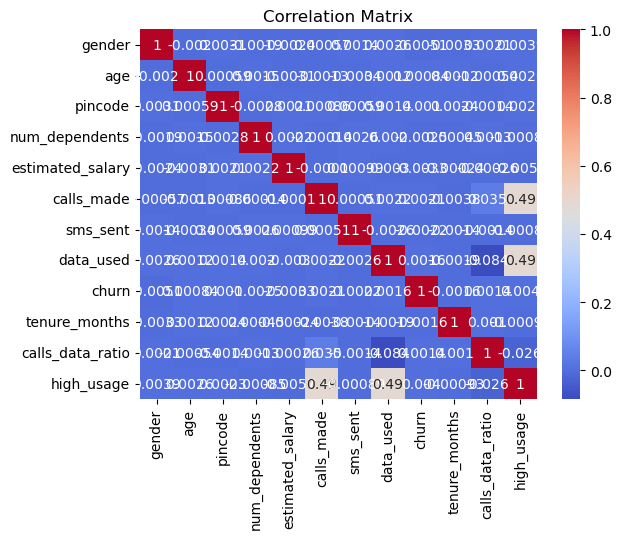

In [29]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
#Feature Engineering

df['calls_sms_interaction'] = df['calls_made'] * df['sms_sent']
df['calls_tenure_interaction'] = df['calls_made'] * df['tenure_months']

In [31]:
bins = [0, 35, 65, 100]
labels = ['Young', 'Middle_Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [32]:
df['calls_data_interaction'] = df['calls_made'] * df['data_used']
df['calls_tenure_interaction'] = df['calls_made'] * df['tenure_months']

In [33]:
df.head()

,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,...,salary_group,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,calls_data_ratio,high_usage,calls_sms_interaction,calls_tenure_interaction,age_group,calls_data_interaction
0,0,25,Karnataka,Kolkata,755597,4,124962,44.0,45.0,5092.0,...,High,False,True,False,0.008639,0,1980.0,2816.0,Young,224048.0
1,0,55,Mizoram,Mumbai,125926,2,130556,62.0,39.0,5973.0,...,High,False,True,False,0.010378,1,2418.0,3968.0,Middle_Aged,370326.0
2,0,57,Arunachal Pradesh,Delhi,423976,0,148828,49.0,24.0,193.0,...,High,False,False,True,0.252577,0,1176.0,3136.0,Middle_Aged,9457.0
3,1,46,Tamil Nadu,Kolkata,522841,1,38722,80.0,25.0,9377.0,...,Low,True,False,False,0.008531,1,2000.0,5120.0,Middle_Aged,750160.0
4,0,26,Tripura,Delhi,740247,2,55098,78.0,15.0,1393.0,...,Medium,True,False,False,0.055954,0,1170.0,4992.0,Young,108654.0


In [34]:
# Handle Class Imbalance


from sklearn.utils import resample

df_majority = df[df['churn'] == 0]
df_minority = df[df['churn'] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [35]:
df.head()

,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,...,salary_group,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,calls_data_ratio,high_usage,calls_sms_interaction,calls_tenure_interaction,age_group,calls_data_interaction
0,0,25,Karnataka,Kolkata,755597,4,124962,44.0,45.0,5092.0,...,High,False,True,False,0.008639,0,1980.0,2816.0,Young,224048.0
1,0,55,Mizoram,Mumbai,125926,2,130556,62.0,39.0,5973.0,...,High,False,True,False,0.010378,1,2418.0,3968.0,Middle_Aged,370326.0
2,0,57,Arunachal Pradesh,Delhi,423976,0,148828,49.0,24.0,193.0,...,High,False,False,True,0.252577,0,1176.0,3136.0,Middle_Aged,9457.0
3,1,46,Tamil Nadu,Kolkata,522841,1,38722,80.0,25.0,9377.0,...,Low,True,False,False,0.008531,1,2000.0,5120.0,Middle_Aged,750160.0
4,0,26,Tripura,Delhi,740247,2,55098,78.0,15.0,1393.0,...,Medium,True,False,False,0.055954,0,1170.0,4992.0,Young,108654.0


In [36]:
df.drop(columns=['pincode','age_group'], inplace=True)
df.head()

,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,...,tenure_months,salary_group,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,calls_data_ratio,high_usage,calls_sms_interaction,calls_tenure_interaction,calls_data_interaction
0,0,25,Karnataka,Kolkata,4,124962,44.0,45.0,5092.0,0,...,64,High,False,True,False,0.008639,0,1980.0,2816.0,224048.0
1,0,55,Mizoram,Mumbai,2,130556,62.0,39.0,5973.0,0,...,64,High,False,True,False,0.010378,1,2418.0,3968.0,370326.0
2,0,57,Arunachal Pradesh,Delhi,0,148828,49.0,24.0,193.0,1,...,64,High,False,False,True,0.252577,0,1176.0,3136.0,9457.0
3,1,46,Tamil Nadu,Kolkata,1,38722,80.0,25.0,9377.0,1,...,64,Low,True,False,False,0.008531,1,2000.0,5120.0,750160.0
4,0,26,Tripura,Delhi,2,55098,78.0,15.0,1393.0,0,...,64,Medium,True,False,False,0.055954,0,1170.0,4992.0,108654.0


In [37]:
df.drop(columns=['num_dependents'])

,gender,age,state,city,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_group,tenure_months,salary_group,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,calls_data_ratio,high_usage,calls_sms_interaction,calls_tenure_interaction,calls_data_interaction
0,0,25,Karnataka,Kolkata,124962,44.0,45.0,5092.0,0,Loyal (>1yr),64,High,False,True,False,0.008639,0,1980.0,2816.0,224048.0
1,0,55,Mizoram,Mumbai,130556,62.0,39.0,5973.0,0,Loyal (>1yr),64,High,False,True,False,0.010378,1,2418.0,3968.0,370326.0
2,0,57,Arunachal Pradesh,Delhi,148828,49.0,24.0,193.0,1,Loyal (>1yr),64,High,False,False,True,0.252577,0,1176.0,3136.0,9457.0
3,1,46,Tamil Nadu,Kolkata,38722,80.0,25.0,9377.0,1,Loyal (>1yr),64,Low,True,False,False,0.008531,1,2000.0,5120.0,750160.0
4,0,26,Tripura,Delhi,55098,78.0,15.0,1393.0,0,Loyal (>1yr),64,Medium,True,False,False,0.055954,0,1170.0,4992.0,108654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,0,28,Mizoram,Kolkata,130580,28.0,9.0,4102.0,0,Loyal (>1yr),23,High,False,False,False,0.006824,0,252.0,644.0,114856.0
243549,0,52,Assam,Kolkata,82393,80.0,45.0,7521.0,0,Loyal (>1yr),23,Medium,False,True,False,0.010635,1,3600.0,1840.0,601680.0
243550,1,59,Tripura,Kolkata,51298,26.0,4.0,6547.0,0,Loyal (>1yr),23,Medium,False,True,False,0.003971,0,104.0,598.0,170222.0
243551,1,49,Madhya Pradesh,Kolkata,83981,80.0,15.0,1125.0,0,Loyal (>1yr),23,Medium,True,False,False,0.071048,0,1200.0,1840.0,90000.0


In [38]:
df.dtypes

gender                             int64
age                                int64
state                             object
city                              object
num_dependents                     int64
estimated_salary                   int64
calls_made                       float64
sms_sent                         float64
data_used                        float64
churn                              int64
tenure_group                    category
tenure_months                      int64
salary_group                    category
telecom_partner_BSNL                bool
telecom_partner_Reliance Jio        bool
telecom_partner_Vodafone            bool
calls_data_ratio                 float64
high_usage                         int32
calls_sms_interaction            float64
calls_tenure_interaction         float64
calls_data_interaction           float64
dtype: object

In [39]:
#drop
df.drop(columns=['state', 'city','tenure_group','salary_group'], inplace=True)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_balanced.drop(columns=['churn'])

# Ensure all columns in X are numeric
X = X.select_dtypes(include=['number'])

y = df_balanced['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reduce overfitting by limiting model complexity
model = RandomForestClassifier(
    n_estimators=200,          # Reduce number of trees
    max_depth=15,              # Limit tree depth to prevent deep overfitting
    min_samples_split=10,      # Require more samples per split
    min_samples_leaf=5,        # Require at least 5 samples per leaf node
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
 


              precision    recall  f1-score   support

           0       0.80      0.74      0.77     38946
           1       0.76      0.81      0.79     38945

    accuracy                           0.78     77891
   macro avg       0.78      0.78      0.78     77891
weighted avg       0.78      0.78      0.78     77891



In [41]:
# Trying Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Performance Report
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.96      0.76      0.85     38946
           1       0.80      0.97      0.88     38945

    accuracy                           0.87     77891
   macro avg       0.88      0.87      0.86     77891
weighted avg       0.88      0.87      0.86     77891



In [42]:
print(dt_model.get_depth())  # model is your trained Decision Tree


80


In [44]:
dt_model = DecisionTreeClassifier(
    max_depth=15,  # Limit the depth to prevent overfitting
    class_weight='balanced',
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Performance Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.53      0.65      0.58     38946
           1       0.55      0.42      0.47     38945

    accuracy                           0.54     77891
   macro avg       0.54      0.54      0.53     77891
weighted avg       0.54      0.54      0.53     77891



In [50]:
# Logical Features
df['high_salary'] = (df['estimated_salary'] > df['estimated_salary'].median()).astype(int)
df['high_data_usage'] = (df['data_used'] > df['data_used'].median()).astype(int)
df['has_dependents'] = (df['num_dependents'] > 0).astype(int)

bins = [0, 30, 50, 100]
labels = ['Young', 'Middle_Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Mathematical Features
df['call_sms_ratio'] = df['calls_made'] / (df['sms_sent'] + 1)
df['data_salary_ratio'] = df['data_used'] / (df['estimated_salary'] + 1)
df['calls_tenure_interaction'] = df['calls_made'] * df['tenure_months']
df['data_sms_interaction'] = df['data_used'] * df['sms_sent']

# Normalized Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['calls_made_norm', 'sms_sent_norm', 'data_used_norm']] = scaler.fit_transform(df[['calls_made', 'sms_sent', 'data_used']])

# Advanced Features
df['churn_risk_score'] = (
    0.3 * df['calls_made'] +
    0.3 * df['data_used'] +
    0.2 * df['sms_sent'] +
    0.2 * df['tenure_months']
)
df['salary_dependents_interaction'] = df['estimated_salary'] / (df['num_dependents'] + 1)
df.head(10)

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_months,telecom_partner_BSNL,...,has_dependents,age_group,call_sms_ratio,data_salary_ratio,data_sms_interaction,calls_made_norm,sms_sent_norm,data_used_norm,churn_risk_score,salary_dependents_interaction
0,0,25,4,124962,44.0,45.0,5092.0,0,64,False,...,1,Young,0.956522,0.040748,229140.0,0.407407,0.849057,0.463288,1562.6,24992.400000
1,0,55,2,130556,62.0,39.0,5973.0,0,64,False,...,1,Senior,1.550000,0.045750,232947.0,0.574074,0.735849,0.543445,1831.1,43518.666667
2,0,57,0,148828,49.0,24.0,193.0,1,64,False,...,0,Senior,1.960000,0.001297,4632.0,0.453704,0.452830,0.017560,90.2,148828.000000
3,1,46,1,38722,80.0,25.0,9377.0,1,64,True,...,1,Middle_Aged,3.076923,0.242156,234425.0,0.740741,0.471698,0.853153,2854.9,19361.000000
4,0,26,2,55098,78.0,15.0,1393.0,0,64,True,...,1,Young,4.875000,0.025282,20895.0,0.722222,0.283019,0.126740,457.1,18366.000000
5,1,36,1,73452,91.0,24.0,8109.0,0,64,False,...,1,Middle_Aged,3.640000,0.110397,194616.0,0.842593,0.452830,0.737785,2477.6,36726.000000
6,0,60,1,110035,36.0,13.0,8512.0,0,64,True,...,1,Senior,2.571429,0.077357,110656.0,0.333333,0.245283,0.774452,2579.8,55017.500000
7,1,46,4,104541,87.0,40.0,2245.0,1,64,True,...,1,Middle_Aged,2.121951,0.021475,89800.0,0.805556,0.754717,0.204258,720.4,20908.200000
8,0,53,2,79439,34.0,12.0,10039.0,0,64,False,...,1,Senior,2.615385,0.126372,120468.0,0.314815,0.226415,0.913384,3037.1,26479.666667
9,0,57,0,126422,61.0,33.0,567.0,0,64,True,...,0,Senior,1.794118,0.004485,18711.0,0.564815,0.622642,0.051588,207.8,126422.000000


In [48]:
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

pincode                     0.129596
estimated_salary            0.126637
calls_tenure_interaction    0.097440
data_used                   0.092809
calls_sms_interaction       0.091799
calls_data_interaction      0.088676
calls_data_ratio            0.082433
age                         0.081795
tenure_months               0.063341
sms_sent                    0.058054
calls_made                  0.040567
num_dependents              0.030902
gender                      0.014175
high_usage                  0.001776
dtype: float64


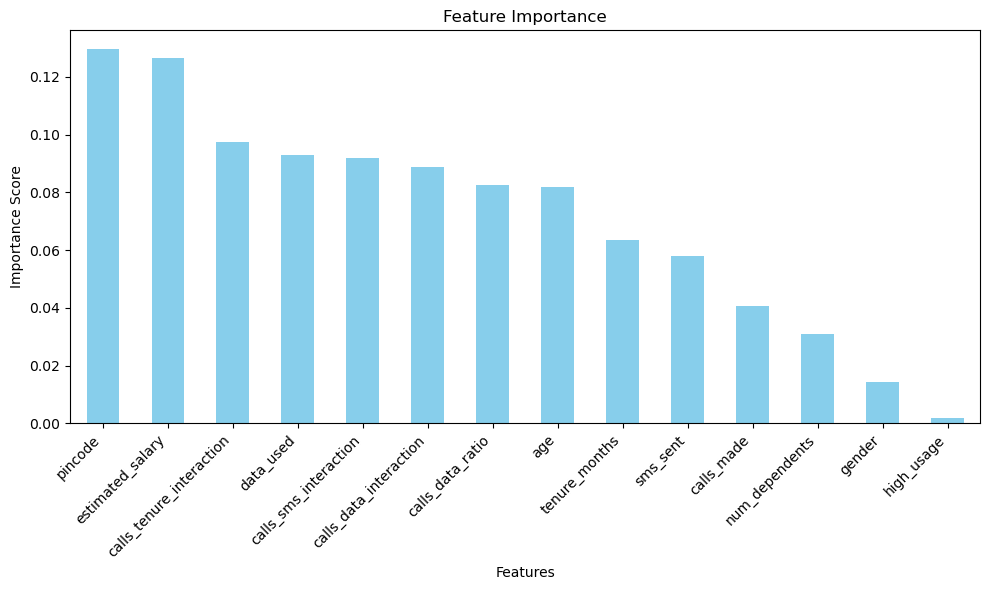

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `feature_importances` is a pandas Series with feature names as the index
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
# Drop low-importance features
low_importance_features = ['gender', 'high_usage', 'num_dependents', 'has_dependents', 'age_group']
df.drop(columns=[col for col in low_importance_features if col in df.columns], inplace=True)

# Sanity check
df.head()

,age,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_months,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,...,high_salary,high_data_usage,call_sms_ratio,data_salary_ratio,data_sms_interaction,calls_made_norm,sms_sent_norm,data_used_norm,churn_risk_score,salary_dependents_interaction
0,25,124962,44.0,45.0,5092.0,0,64,False,True,False,...,1,0,0.956522,0.040748,229140.0,0.407407,0.849057,0.463288,1562.6,24992.400000
1,55,130556,62.0,39.0,5973.0,0,64,False,True,False,...,1,1,1.550000,0.045750,232947.0,0.574074,0.735849,0.543445,1831.1,43518.666667
2,57,148828,49.0,24.0,193.0,1,64,False,False,True,...,1,0,1.960000,0.001297,4632.0,0.453704,0.452830,0.017560,90.2,148828.000000
3,46,38722,80.0,25.0,9377.0,1,64,True,False,False,...,0,1,3.076923,0.242156,234425.0,0.740741,0.471698,0.853153,2854.9,19361.000000
4,26,55098,78.0,15.0,1393.0,0,64,True,False,False,...,0,0,4.875000,0.025282,20895.0,0.722222,0.283019,0.126740,457.1,18366.000000


In [52]:
# Drop additional low-importance or redundant features
additional_features_to_drop = [
    'calls_made_norm', 'sms_sent_norm', 'data_used_norm',  # Normalized features
    'call_sms_ratio', 'data_salary_ratio', 'data_sms_interaction',  # Interaction features
    'churn_risk_score',  # Redundant feature
    'telecom_partner_BSNL', 'telecom_partner_Reliance Jio', 'telecom_partner_Vodafone'  # Telecom partner features
]

df.drop(columns=[col for col in additional_features_to_drop if col in df.columns], inplace=True)



In [53]:
# Update X_train and X_test
X = df_balanced.drop(columns=['churn'])  # Ensure 'churn' is not dropped
X = X.select_dtypes(include=['number'])  # Keep only numeric columns

y = df_balanced['churn']

# Re-split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     38946
           1       0.76      0.81      0.79     38945

    accuracy                           0.78     77891
   macro avg       0.78      0.78      0.78     77891
weighted avg       0.78      0.78      0.78     77891

Confusion Matrix:
[[28944 10002]
 [ 7273 31672]]


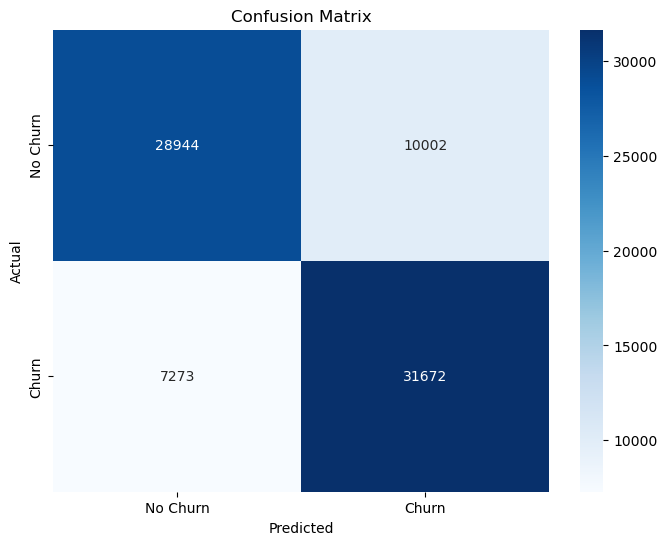

Accuracy: 0.78


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [59]:
# Check the depth of the Decision Tree model
tree_depth = dt_model.get_depth()
print(f"The depth of the Decision Tree is: {tree_depth}")

The depth of the Decision Tree is: 15


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     38946
           1       0.76      0.81      0.79     38945

    accuracy                           0.78     77891
   macro avg       0.78      0.78      0.78     77891
weighted avg       0.78      0.78      0.78     77891

Random Forest Confusion Matrix:
[[28944 10002]
 [ 7273 31672]]


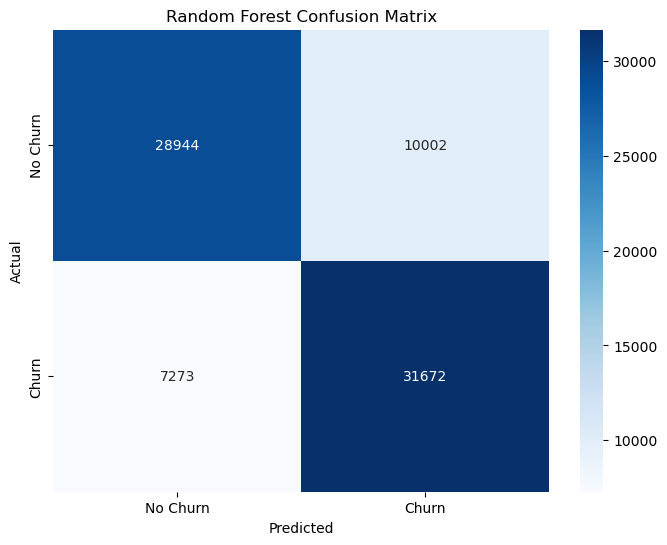

Random Forest Accuracy: 0.78


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,          # Number of trees
    max_depth=15,              # Limit tree depth
    min_samples_split=10,      # Minimum samples per split
    min_samples_leaf=5,        # Minimum samples per leaf
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

In [61]:
# Evaluate Random Forest on training data
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.2f}")

Random Forest Training Accuracy: 0.88


In [62]:
# Evaluate Decision Tree on training data
y_train_pred_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Decision Tree Training Accuracy: {train_accuracy_dt:.2f}")

Decision Tree Training Accuracy: 0.55


In [63]:
dt_model = DecisionTreeClassifier(
    max_depth=20,              # Increase depth
    min_samples_split=5,       # Allow smaller splits
    min_samples_leaf=2,        # Allow smaller leaf nodes
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)
dt_model.fit(X_train, y_train)

# Evaluate again
y_train_pred_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Updated Decision Tree Training Accuracy: {train_accuracy_dt:.2f}")

Updated Decision Tree Training Accuracy: 0.59


In [64]:
dt_model = DecisionTreeClassifier(
    max_depth=30,              # Further increase depth
    min_samples_split=2,       # Allow even smaller splits
    min_samples_leaf=1,        # Allow smaller leaf nodes
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)
dt_model.fit(X_train, y_train)

# Evaluate again
y_train_pred_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Updated Decision Tree Training Accuracy: {train_accuracy_dt:.2f}")

Updated Decision Tree Training Accuracy: 0.72


In [65]:
# Evaluate Decision Tree on test data
y_test_pred_dt = dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree Test Accuracy: {test_accuracy_dt:.2f}")

Decision Tree Test Accuracy: 0.65


In [66]:
dt_model = DecisionTreeClassifier(
    max_depth=25,              # Slightly reduce depth
    min_samples_split=10,      # Require more samples per split
    min_samples_leaf=5,        # Require more samples per leaf
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)
dt_model.fit(X_train, y_train)

# Evaluate again
y_train_pred_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Updated Decision Tree Training Accuracy: {train_accuracy_dt:.2f}")

y_test_pred_dt = dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Updated Decision Tree Test Accuracy: {test_accuracy_dt:.2f}")

Updated Decision Tree Training Accuracy: 0.64
Updated Decision Tree Test Accuracy: 0.59


In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(
    n_estimators=200,          # Number of boosting rounds
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Step size shrinkage
    scale_pos_weight=1,        # Handle class imbalance
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60     38946
           1       0.60      0.63      0.62     38945

    accuracy                           0.61     77891
   macro avg       0.61      0.61      0.61     77891
weighted avg       0.61      0.61      0.61     77891

XGBoost Accuracy: 0.61


[LightGBM] [Info] Number of positive: 155781, number of negative: 155780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 311561, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000006
[LightGBM] [Info] Start training from score 0.000006
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[200]	train's binary_logloss: 0.664408	test's binary_logloss: 0.675713
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59     38946
           1       0.59      0.63      0.61     38945

    accuracy                           0.60     77891
   macro av

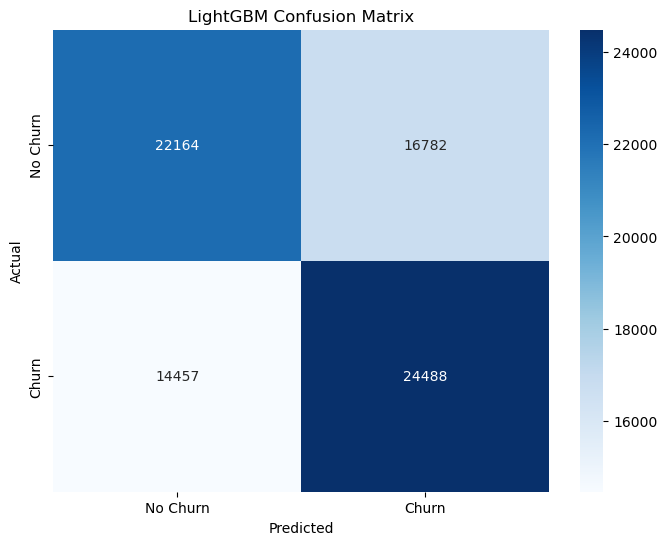

LightGBM Accuracy: 0.60


In [72]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the LightGBM dataset
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# Define LightGBM parameters
params = {
    'objective': 'binary',          # Binary classification
    'boosting_type': 'gbdt',        # Gradient Boosting Decision Tree
    'metric': 'binary_logloss',     # Evaluation metric
    'is_unbalance': True,           # Handle class imbalance
    'learning_rate': 0.1,           # Learning rate
    'num_leaves': 31,               # Maximum number of leaves in one tree
    'max_depth': -1,                # No limit on tree depth
    'feature_fraction': 0.8,        # Fraction of features to use in each iteration
    'bagging_fraction': 0.8,        # Fraction of data to use in each iteration
    'bagging_freq': 5,              # Perform bagging every 5 iterations
    'seed': 42                      # Random seed for reproducibility
}

# Train the LightGBM model
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=200,            # Number of boosting iterations
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train', 'test'],
    callbacks=[lgb.early_stopping(stopping_rounds=20)]  # Use early stopping callback
)

# Make predictions on the test set
y_pred_prob = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM Confusion Matrix')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],              # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],            # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.8, 1.0],     # Fraction of features used per tree
    'scale_pos_weight': [1, 2, 3],           # Handle class imbalance
    'gamma': [0, 0.1, 0.2, 0.3]              # Minimum loss reduction for split
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train) 

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:25:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best Cross-Validation Accuracy: 0.7974489695034138
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     38946
           1       0.82      0.86      0.84     38945

    accuracy                           0.84     77891
   macro avg       0.84      0.84      0.84     77891
weighted avg       0.84      0.84      0.84     77891

Test Set Accuracy: 0.84


In [74]:
import joblib

# Save the best XGBoost model
joblib.dump(best_model, 'xgboost_churn_model.pkl')
print("Model saved as 'xgboost_churn_model.pkl'")

Model saved as 'xgboost_churn_model.pkl'
